In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pylab as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')
import pickle

In [3]:
df = pd.read_csv("../../dataset/proper_dataset1.csv")

In [4]:
df.isna().sum()

N            0
P            0
K            0
ph           0
ec           0
oc           0
S            0
zn           0
fe           0
cu           0
Mn           0
B            0
fertility    0
dtype: int64

In [4]:
df.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [5]:
df.corr()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
N,1.000000,-0.010049,0.050616,0.075138,-0.005646,0.029887,-0.124959,0.054240,0.076108,-0.183832,0.105870,-0.170835,0.707383
P,-0.010049,1.000000,0.086964,0.004857,0.006082,-0.008996,-0.100204,-0.016912,0.141165,0.054689,0.045265,-0.097401,0.212780
K,0.050616,0.086964,1.000000,0.002661,-0.109726,-0.029005,0.026489,-0.002511,-0.053442,-0.005597,0.021157,0.108025,0.059666
ph,0.075138,0.004857,0.002661,1.000000,0.058217,-0.015926,0.013164,-0.008321,-0.032685,-0.000223,-0.008488,0.010115,0.082584
ec,-0.005646,0.006082,-0.109726,0.058217,1.000000,-0.007045,0.051810,-0.035703,-0.041525,0.035638,-0.043662,-0.004469,-0.025346
oc,0.029887,-0.008996,-0.029005,-0.015926,-0.007045,1.000000,0.046813,0.625683,0.282128,-0.009703,-0.078540,0.106760,0.035416
S,-0.124959,-0.100204,0.026489,0.013164,0.051810,0.046813,1.000000,-0.013870,-0.208752,0.158130,-0.226249,0.478017,-0.061733
zn,0.054240,-0.016912,-0.002511,-0.008321,-0.035703,0.625683,-0.013870,1.000000,0.548485,-0.051229,-0.065154,0.056252,0.032089
fe,0.076108,0.141165,-0.053442,-0.032685,-0.041525,0.282128,-0.208752,0.548485,1.000000,0.138121,0.275564,-0.332181,0.037625
cu,-0.183832,0.054689,-0.005597,-0.000223,0.035638,-0.009703,0.158130,-0.051229,0.138121,1.000000,0.079934,0.101115,-0.136954


In [6]:
df1 = df.drop(["zn"], axis=1)

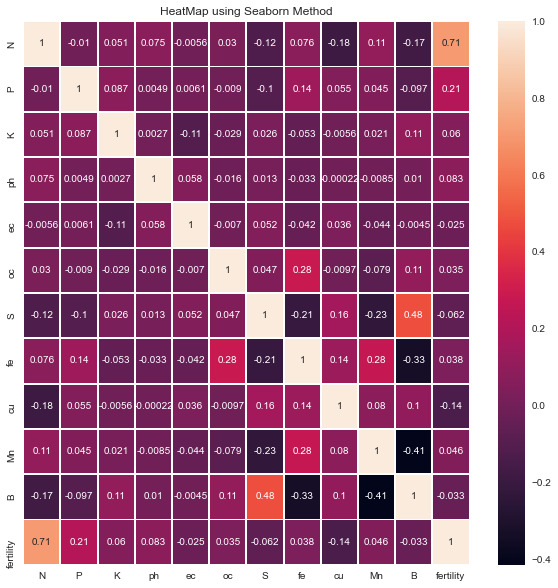

In [7]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(df1.corr(), linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

In [8]:
df1.columns

Index(['N', 'P', 'K', 'ph', 'ec', 'oc', 'S', 'fe', 'cu', 'Mn', 'B',
       'fertility'],
      dtype='object')

# Cross Validation

In [9]:
X = df1.drop(['fertility'], axis = 1)
y = df1["fertility"]

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# Model Creation

In [11]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [12]:
def model_training_metrics(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    clf = classification_report(y_test, y_pred)
    print(clf)

# Random Forest Classifier

In [13]:
rfc = RandomForestClassifier()
model_training_metrics(rfc)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        80
           1       0.88      0.94      0.91        88
           2       0.00      0.00      0.00         8

    accuracy                           0.90       176
   macro avg       0.60      0.63      0.61       176
weighted avg       0.86      0.90      0.88       176



# Extra Trees Classifier

In [14]:
etc = ExtraTreesClassifier()
model_training_metrics(etc)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        80
           1       0.88      0.94      0.91        88
           2       1.00      0.12      0.22         8

    accuracy                           0.90       176
   macro avg       0.94      0.67      0.69       176
weighted avg       0.91      0.90      0.89       176



# AdaBoostClassifier

In [15]:
ada = AdaBoostClassifier()
model_training_metrics(ada)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        80
           1       0.80      0.81      0.80        88
           2       0.33      0.25      0.29         8

    accuracy                           0.80       176
   macro avg       0.65      0.63      0.64       176
weighted avg       0.79      0.80      0.79       176



# Support Vector Machine

In [16]:
svc = SVC()
model_training_metrics(svc)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        80
           1       0.80      0.95      0.87        88
           2       0.00      0.00      0.00         8

    accuracy                           0.85       176
   macro avg       0.58      0.59      0.58       176
weighted avg       0.82      0.85      0.83       176



# Linear svc

In [17]:
svc = LinearSVC()
model_training_metrics(svc)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        80
           1       0.88      0.89      0.88        88
           2       0.00      0.00      0.00         8

    accuracy                           0.88       176
   macro avg       0.58      0.61      0.60       176
weighted avg       0.84      0.88      0.85       176



# Logistic regression

In [18]:
lr = LogisticRegression()
model_training_metrics(lr)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        80
           1       0.80      0.93      0.86        88
           2       0.00      0.00      0.00         8

    accuracy                           0.85       176
   macro avg       0.57      0.59      0.58       176
weighted avg       0.81      0.85      0.83       176



# Ridge CV

In [19]:
rcv = RidgeClassifier()
model_training_metrics(rcv)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        80
           1       0.82      0.95      0.88        88
           2       0.00      0.00      0.00         8

    accuracy                           0.87       176
   macro avg       0.59      0.61      0.59       176
weighted avg       0.84      0.87      0.85       176



# Knearest Neighbour

In [20]:
knn = KNeighborsClassifier()
model_training_metrics(knn)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        80
           1       0.82      0.92      0.87        88
           2       0.00      0.00      0.00         8

    accuracy                           0.85       176
   macro avg       0.57      0.59      0.58       176
weighted avg       0.81      0.85      0.83       176



# LightGBM

In [21]:
lgbm = LGBMClassifier()
model_training_metrics(lgbm)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        80
           1       0.88      0.90      0.89        88
           2       0.40      0.25      0.31         8

    accuracy                           0.88       176
   macro avg       0.73      0.69      0.70       176
weighted avg       0.87      0.88      0.87       176



# XGBClassifier

In [22]:
xgb = XGBClassifier()
model_training_metrics(xgb)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.91      0.89      0.90        88
           2       0.29      0.25      0.27         8

    accuracy                           0.89       176
   macro avg       0.70      0.70      0.70       176
weighted avg       0.88      0.89      0.88       176



# MLP classifier

In [33]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu',hidden_layer_sizes=80)
model_training_metrics(mlp)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        80
           1       0.76      0.86      0.81        88
           2       0.00      0.00      0.00         8

    accuracy                           0.79       176
   macro avg       0.53      0.55      0.54       176
weighted avg       0.76      0.79      0.77       176



# Saving Model

In [166]:
pickle.dump(rfc, open("model.cpickle", "wb"))

In [167]:
model = pickle.load(open("model.cpickle", "rb"))

In [169]:
model

RandomForestClassifier()

In [4]:
df = pd.read_csv("../dataset/crop_db.csv")

In [5]:
df.head()

,crop,min_rainfall,max_rainfall,fertility
0,Rice,500,1000,2
1,Wheat,450,650,2
2,Sorghum,450,650,1
3,Maize,500,800,1
4,Sugarcane,150,550,2


In [7]:
len(df['crop'].unique())

74

In [9]:
df['fertility'].unique()

array([2, 1, 0], dtype=int64)

In [16]:
min_rainfall = sorted(set(df['min_rainfall']))
max_rainfall = sorted(set(df['max_rainfall']))
rainfall_data = {"min_rainfall": min_rainfall, "max_rainfall": max_rainfall}
pickle.dump(rainfall_data, open("rainfall_stats.pkl", "wb"))